In [2]:
import requests

ticker = 'AAPL'
start = '2021-12-31'
end = '2023-01-20'
api_key = 'rW1fMPt5T8N4lrq6J4HM58LKZj1VBoPl'
url = 'https://api.polygon.io/v2/aggs/ticker/' + ticker + '/range/1/day/' + start + '/' + end + '?adjusted=true&sort=asc&limit=120&apiKey=' + api_key

response = requests.get(url).json()

print(response)

{'ticker': 'AAPL', 'queryCount': 120, 'resultsCount': 120, 'adjusted': True, 'results': [{'v': 64062261.0, 'vw': 177.8004, 'o': 178.085, 'c': 177.57, 'h': 179.23, 'l': 177.26, 't': 1640926800000, 'n': 451687}, {'v': 104677470.0, 'vw': 181.4156, 'o': 177.83, 'c': 182.01, 'h': 182.88, 'l': 177.71, 't': 1641186000000, 'n': 772691}, {'v': 99110438.0, 'vw': 180.5574, 'o': 182.63, 'c': 179.7, 'h': 182.94, 'l': 179.12, 't': 1641272400000, 'n': 831890}, {'v': 94535602.0, 'vw': 177.2884, 'o': 179.61, 'c': 174.92, 'h': 180.17, 'l': 174.64, 't': 1641358800000, 'n': 848513}, {'v': 96882954.0, 'vw': 173.08, 'o': 172.7, 'c': 172, 'h': 175.3, 'l': 171.64, 't': 1641445200000, 'n': 960340}, {'v': 86709147.0, 'vw': 172.4383, 'o': 172.89, 'c': 172.17, 'h': 174.14, 'l': 171.03, 't': 1641531600000, 'n': 716881}, {'v': 106754551.0, 'vw': 170.2886, 'o': 169.08, 'c': 172.19, 'h': 172.5, 'l': 168.17, 't': 1641790800000, 'n': 956337}, {'v': 76138312.0, 'vw': 173.6337, 'o': 172.32, 'c': 175.08, 'h': 175.18, 'l':

In [3]:
import pandas as pd
from datetime import datetime, date, timedelta


results = pd.DataFrame.from_dict(response['results'])
results.columns = ['volume', 'vwap', 'open', 'close', 'high', 'low', 'timestamp', 'n']

results.head()

,volume,vwap,open,close,high,low,timestamp,n
0,64062261.0,177.8004,178.085,177.57,179.23,177.26,1640926800000,451687
1,104677470.0,181.4156,177.830,182.01,182.88,177.71,1641186000000,772691
2,99110438.0,180.5574,182.630,179.70,182.94,179.12,1641272400000,831890
3,94535602.0,177.2884,179.610,174.92,180.17,174.64,1641358800000,848513
4,96882954.0,173.0800,172.700,172.00,175.30,171.64,1641445200000,960340


In [4]:
results['date'] = results.timestamp.apply(lambda i: date.fromtimestamp(i/1000))

results = results[['volume', 'vwap', 'open', 'close', 'high', 'low', 'date', 'n']].set_index('date')
results.head()

,volume,vwap,open,close,high,low,n
date,,,,,,,
2021-12-31,64062261.0,177.8004,178.085,177.57,179.23,177.26,451687
2022-01-03,104677470.0,181.4156,177.830,182.01,182.88,177.71,772691
2022-01-04,99110438.0,180.5574,182.630,179.70,182.94,179.12,831890
2022-01-05,94535602.0,177.2884,179.610,174.92,180.17,174.64,848513
2022-01-06,96882954.0,173.0800,172.700,172.00,175.30,171.64,960340


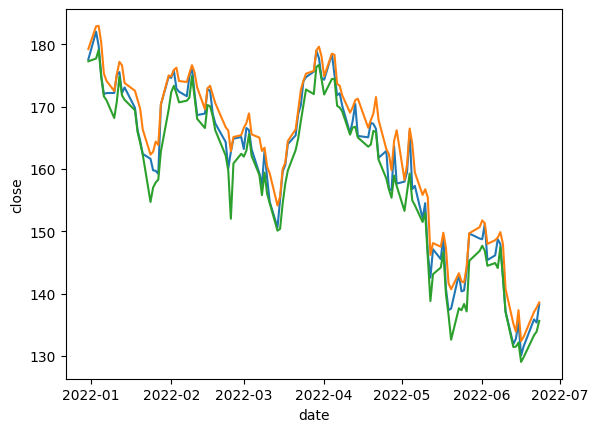

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data = results, x = 'date', y = 'close');
sns.lineplot(data = results, x = 'date', y = 'high');
sns.lineplot(data = results, x = 'date', y = 'low');

In [6]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 2021-12-31 to 2022-06-23
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   volume  120 non-null    float64
 1   vwap    120 non-null    float64
 2   open    120 non-null    float64
 3   close   120 non-null    float64
 4   high    120 non-null    float64
 5   low     120 non-null    float64
 6   n       120 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 11.6+ KB


In [7]:
import numpy as np

np.std(results.close)

12.973482717697237

In [8]:
def close_price_range(start, n):
    ''' returns a range of dates, starting on the 'start' date and stretching back 'n' days '''
    date_object = datetime.strptime(start, "%Y-%m-%d").date()
    delta = timedelta(n)
    return results.close[date_object - delta : date_object]

In [9]:
close_price_range("2022-06-15", 60)

date
2022-04-18    165.07
2022-04-19    167.40
2022-04-20    167.23
2022-04-21    166.42
2022-04-22    161.79
2022-04-25    162.88
2022-04-26    156.80
2022-04-27    156.57
2022-04-28    163.64
2022-04-29    157.65
2022-05-02    157.96
2022-05-03    159.48
2022-05-04    166.02
2022-05-05    156.77
2022-05-06    157.28
2022-05-09    152.06
2022-05-10    154.51
2022-05-11    146.50
2022-05-12    142.56
2022-05-13    147.11
2022-05-16    145.54
2022-05-17    149.24
2022-05-18    140.82
2022-05-19    137.35
2022-05-20    137.59
2022-05-23    143.11
2022-05-24    140.36
2022-05-25    140.52
2022-05-26    143.78
2022-05-27    149.64
2022-05-31    148.84
2022-06-01    148.71
2022-06-02    151.21
2022-06-03    145.38
2022-06-06    146.14
2022-06-07    148.71
2022-06-08    147.96
2022-06-09    142.64
2022-06-10    137.13
2022-06-13    131.88
2022-06-14    132.76
2022-06-15    135.43
Name: close, dtype: float64

In [10]:
def close_price_std(start, n):
    ''' returns a range of dates, starting on the 'start' date and stretching back 'n' days '''
    date_object = datetime.strptime(start, "%Y-%m-%d").date()
    delta = timedelta(n)
    return np.std(results.close[date_object - delta : date_object])

In [11]:
close_price_std("2022-06-15", 60)

9.921029749603465

In [12]:
def close_price_range(start, n):
    ''' returns a range of dates, starting on the 'start' date and stretching 
    back 'n' days '''
    delta = timedelta(n)
    return results.close[start - delta : start]

In [13]:
for i in results.close[60:].index:
    print(np.std(close_price_range(i, 60)))

6.72300146904896
6.8993215020180525
6.90564374420689
6.9011442637261515
6.974827012053601
7.022916977188378
7.014072770989385
6.968012140166354
6.89871149186092
6.801102551672586
6.756498089980438
6.7720446273909145
6.697980887691208
6.733759434473164
6.725514622417189
6.7253417499616726
6.644842394081058
6.6066719476529805
6.625366138857755
6.767822046229726
6.930049838178452
6.860258223131809
6.900156244488027
7.154747088171014
7.220482506757114
7.209634364126873
7.253619569785093
7.2764443732459165
7.560703799919249
7.672223500092666
8.037701877646551
8.643607196991246
8.935366641300334
9.219495441824032
9.491325485258642
10.137707123685493
10.773553285969522
11.304522724965269
11.807168536735437
12.073112590340886
12.256711891635447
12.356245187454968
12.304518034022575
11.471773112567318
11.22858204976499
11.126520913132975
11.126666291313299
10.177460697358743
9.837796651213349
9.553665161862492
9.587359438225542
9.786965896550818
9.601894022956017
9.764271606218253
9.92102974960

In [14]:
ticker = 'AAPL'
api_key = 'rW1fMPt5T8N4lrq6J4HM58LKZj1VBoPl'
url = 'https://api.polygon.io/vX/reference/financials?ticker=AAPL&period_of_report_date.lte=2020-12-31&timeframe=annual&include_sources=false&apiKey=rW1fMPt5T8N4lrq6J4HM58LKZj1VBoPl'

fundamentals_yearly_2020 = requests.get(url).json()

fundamentals_yearly_2020

{'results': [{'financials': {'income_statement': {'revenues': {'label': 'Revenues',
      'value': 274515000000.0,
      'unit': 'USD',
      'order': 100},
     'income_loss_from_continuing_operations_after_tax': {'label': 'Income/Loss From Continuing Operations After Tax',
      'value': 57411000000.0,
      'unit': 'USD',
      'order': 1400},
     'net_income_loss_attributable_to_noncontrolling_interest': {'label': 'Net Income/Loss Attributable To Noncontrolling Interest',
      'value': 0,
      'unit': 'USD',
      'order': 3300},
     'participating_securities_distributed_and_undistributed_earnings_loss_basic': {'label': 'Participating Securities, Distributed And Undistributed Earnings/Loss, Basic',
      'value': 0,
      'unit': 'USD',
      'order': 3800},
     'income_loss_from_continuing_operations_before_tax': {'label': 'Income/Loss From Continuing Operations Before Tax',
      'value': 67091000000.0,
      'unit': 'USD',
      'order': 1500},
     'nonoperating_income_los

In [15]:
pd.DataFrame.from_dict(fundamentals_yearly_2020['results'][0]['financials']['income_statement']).T.sort_values(by = 'order')

,label,value,unit,order
revenues,Revenues,274515000000.0,USD,100
benefits_costs_expenses,Benefits Costs and Expenses,207424000000.0,USD,200
cost_of_revenue,Cost Of Revenue,169559000000.0,USD,300
costs_and_expenses,Costs And Expenses,207424000000.0,USD,600
gross_profit,Gross Profit,104956000000.0,USD,800
nonoperating_income_loss,Nonoperating Income/Loss,803000000.0,USD,900
operating_expenses,Operating Expenses,38668000000.0,USD,1000
operating_income_loss,Operating Income/Loss,66288000000.0,USD,1100
income_loss_from_continuing_operations_after_tax,Income/Loss From Continuing Operations After Tax,57411000000.0,USD,1400
income_loss_from_continuing_operations_before_tax,Income/Loss From Continuing Operations Before Tax,67091000000.0,USD,1500


In [16]:
fundamentals_yearly_2020['results'][0]['filing_date']

'2020-10-30'

In [17]:
ticker = 'AAPL'
api_key = 'rW1fMPt5T8N4lrq6J4HM58LKZj1VBoPl'
url = 'https://api.polygon.io/vX/reference/financials?ticker=' + ticker + '&timeframe=yearly&include_sources=false&apiKey=' + api_key

fundamentals = requests.get(url).json()

fundamentals

{'results': [{'financials': {'balance_sheet': {'noncurrent_assets': {'label': 'Noncurrent Assets',
      'value': 217970000000.0,
      'unit': 'USD',
      'order': 300},
     'other_than_fixed_noncurrent_assets': {'label': 'Other Than Fixed Noncurrent Assets',
      'value': 217970000000.0,
      'unit': 'USD',
      'order': 500},
     'equity_attributable_to_parent': {'label': 'Equity Attributable To Parent',
      'value': 56727000000.0,
      'unit': 'USD',
      'order': 1600},
     'assets': {'label': 'Assets',
      'value': 346747000000.0,
      'unit': 'USD',
      'order': 100},
     'equity': {'label': 'Equity',
      'value': 56727000000.0,
      'unit': 'USD',
      'order': 1400},
     'noncurrent_liabilities': {'label': 'Noncurrent Liabilities',
      'value': 152734000000.0,
      'unit': 'USD',
      'order': 800},
     'current_assets': {'label': 'Current Assets',
      'value': 128777000000.0,
      'unit': 'USD',
      'order': 200},
     'fixed_assets': {'label':

In [18]:
fundamentals.keys()

dict_keys(['results', 'status', 'request_id', 'count', 'next_url'])

In [19]:
fundamentals['results'][0].keys()

dict_keys(['financials', 'start_date', 'end_date', 'filing_date', 'cik', 'company_name', 'fiscal_period', 'fiscal_year', 'source_filing_url', 'source_filing_file_url'])

In [20]:
fundamentals['results'][0]['filing_date']

'2023-02-03'

In [21]:
fundamentals['results'][0]['cik']

'0000320193'

In [22]:
fundamentals['results'][0]['financials'].keys()

dict_keys(['balance_sheet', 'cash_flow_statement', 'comprehensive_income', 'income_statement'])

In [23]:
fundamentals['results'][0]['financials']['comprehensive_income'].keys()

dict_keys(['comprehensive_income_loss_attributable_to_noncontrolling_interest', 'other_comprehensive_income_loss', 'comprehensive_income_loss_attributable_to_parent', 'other_comprehensive_income_loss_attributable_to_parent', 'comprehensive_income_loss'])

In [24]:
fundamentals['results'][0]['financials']['income_statement'].keys()

dict_keys(['net_income_loss_attributable_to_noncontrolling_interest', 'net_income_loss_available_to_common_stockholders_basic', 'costs_and_expenses', 'gross_profit', 'diluted_earnings_per_share', 'participating_securities_distributed_and_undistributed_earnings_loss_basic', 'interest_expense_operating', 'operating_income_loss', 'income_loss_from_continuing_operations_after_tax', 'benefits_costs_expenses', 'nonoperating_income_loss', 'preferred_stock_dividends_and_other_adjustments', 'cost_of_revenue', 'net_income_loss', 'income_tax_expense_benefit', 'basic_earnings_per_share', 'operating_expenses', 'income_loss_from_continuing_operations_before_tax', 'revenues', 'net_income_loss_attributable_to_parent'])

In [25]:
pd.DataFrame.from_dict(fundamentals['results'][0]['financials']['income_statement']).T.sort_values(by = 'order')

,label,value,unit,order
revenues,Revenues,117154000000.0,USD,100
benefits_costs_expenses,Benefits Costs and Expenses,81531000000.0,USD,200
cost_of_revenue,Cost Of Revenue,66822000000.0,USD,300
costs_and_expenses,Costs And Expenses,81531000000.0,USD,600
gross_profit,Gross Profit,50332000000.0,USD,800
nonoperating_income_loss,Nonoperating Income/Loss,-393000000.0,USD,900
operating_expenses,Operating Expenses,14316000000.0,USD,1000
operating_income_loss,Operating Income/Loss,36016000000.0,USD,1100
income_loss_from_continuing_operations_after_tax,Income/Loss From Continuing Operations After Tax,29998000000.0,USD,1400
income_loss_from_continuing_operations_before_tax,Income/Loss From Continuing Operations Before Tax,35623000000.0,USD,1500


In [26]:
ticker = 'AAPL'
api_key = 'rW1fMPt5T8N4lrq6J4HM58LKZj1VBoPl'
url = 'https://api.polygon.io/v3/reference/tickers/AAPL?apiKey=' + api_key

ticker_details = requests.get(url).json()

ticker_details["results"]["branding"]["logo_url"] + "apiKey=" + api_key

'https://api.polygon.io/v1/reference/company-branding/d3d3LmFwcGxlLmNvbQ/images/2023-03-01_logo.svgapiKey=rW1fMPt5T8N4lrq6J4HM58LKZj1VBoPl'

In [27]:
ticker_details

{'request_id': '73471bf22ec777b066459ff94e4e29c4',
 'results': {'ticker': 'AAPL',
  'name': 'Apple Inc.',
  'market': 'stocks',
  'locale': 'us',
  'primary_exchange': 'XNAS',
  'type': 'CS',
  'active': True,
  'currency_name': 'usd',
  'cik': '0000320193',
  'composite_figi': 'BBG000B9XRY4',
  'share_class_figi': 'BBG001S5N8V8',
  'market_cap': 2382626848140.0,
  'phone_number': '(408) 996-1010',
  'address': {'address1': 'ONE APPLE PARK WAY',
   'city': 'CUPERTINO',
   'state': 'CA',
   'postal_code': '95014'},
  'description': "Apple designs a wide variety of consumer electronic devices, including smartphones (iPhone), tablets (iPad), PCs (Mac), smartwatches (Apple Watch), and AirPods. The iPhone makes up most of Apple's total revenue. In addition, Apple offers its customers a variety of services such as Apple Music, iCloud, Apple Care, Apple TV+, Apple Arcade, Apple Fitness, Apple Card, and Apple Pay, among others. Apple's products include internally developed software and semicon

TypeError: Image data of dtype <U139 cannot be converted to float

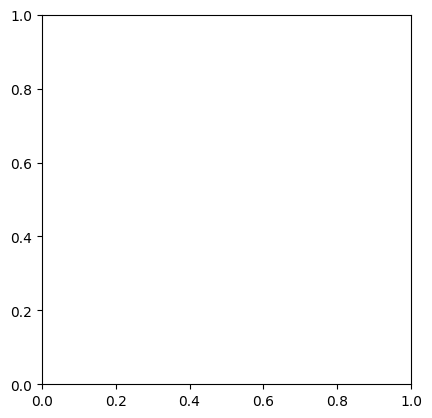

In [31]:
plt.imshow(ticker_details["results"]["branding"]["logo_url"] + '?apiKey=' + api_key)

In [29]:
# Load SVG image from file
with open(ticker_details["results"]["branding"]["logo_url"] + '?apiKey=' + api_key, "rb") as f:
    svg_bytes = f.read()

FileNotFoundError: [Errno 2] No such file or directory: 'https://api.polygon.io/v1/reference/company-branding/d3d3LmFwcGxlLmNvbQ/images/2023-03-01_logo.svg?apiKey=rW1fMPt5T8N4lrq6J4HM58LKZj1VBoPl'